### Decsion Tree

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.tools.plotting import parallel_coordinates, andrews_curves
import matplotlib.pyplot as plt
import pydotplus

%matplotlib inline

In [5]:
flight= sns.load_dataset('iris')

In [6]:
flight.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
68,6.2,2.2,4.5,1.5,versicolor


In [7]:
flight.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
flight.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


C:\Users\Jatan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


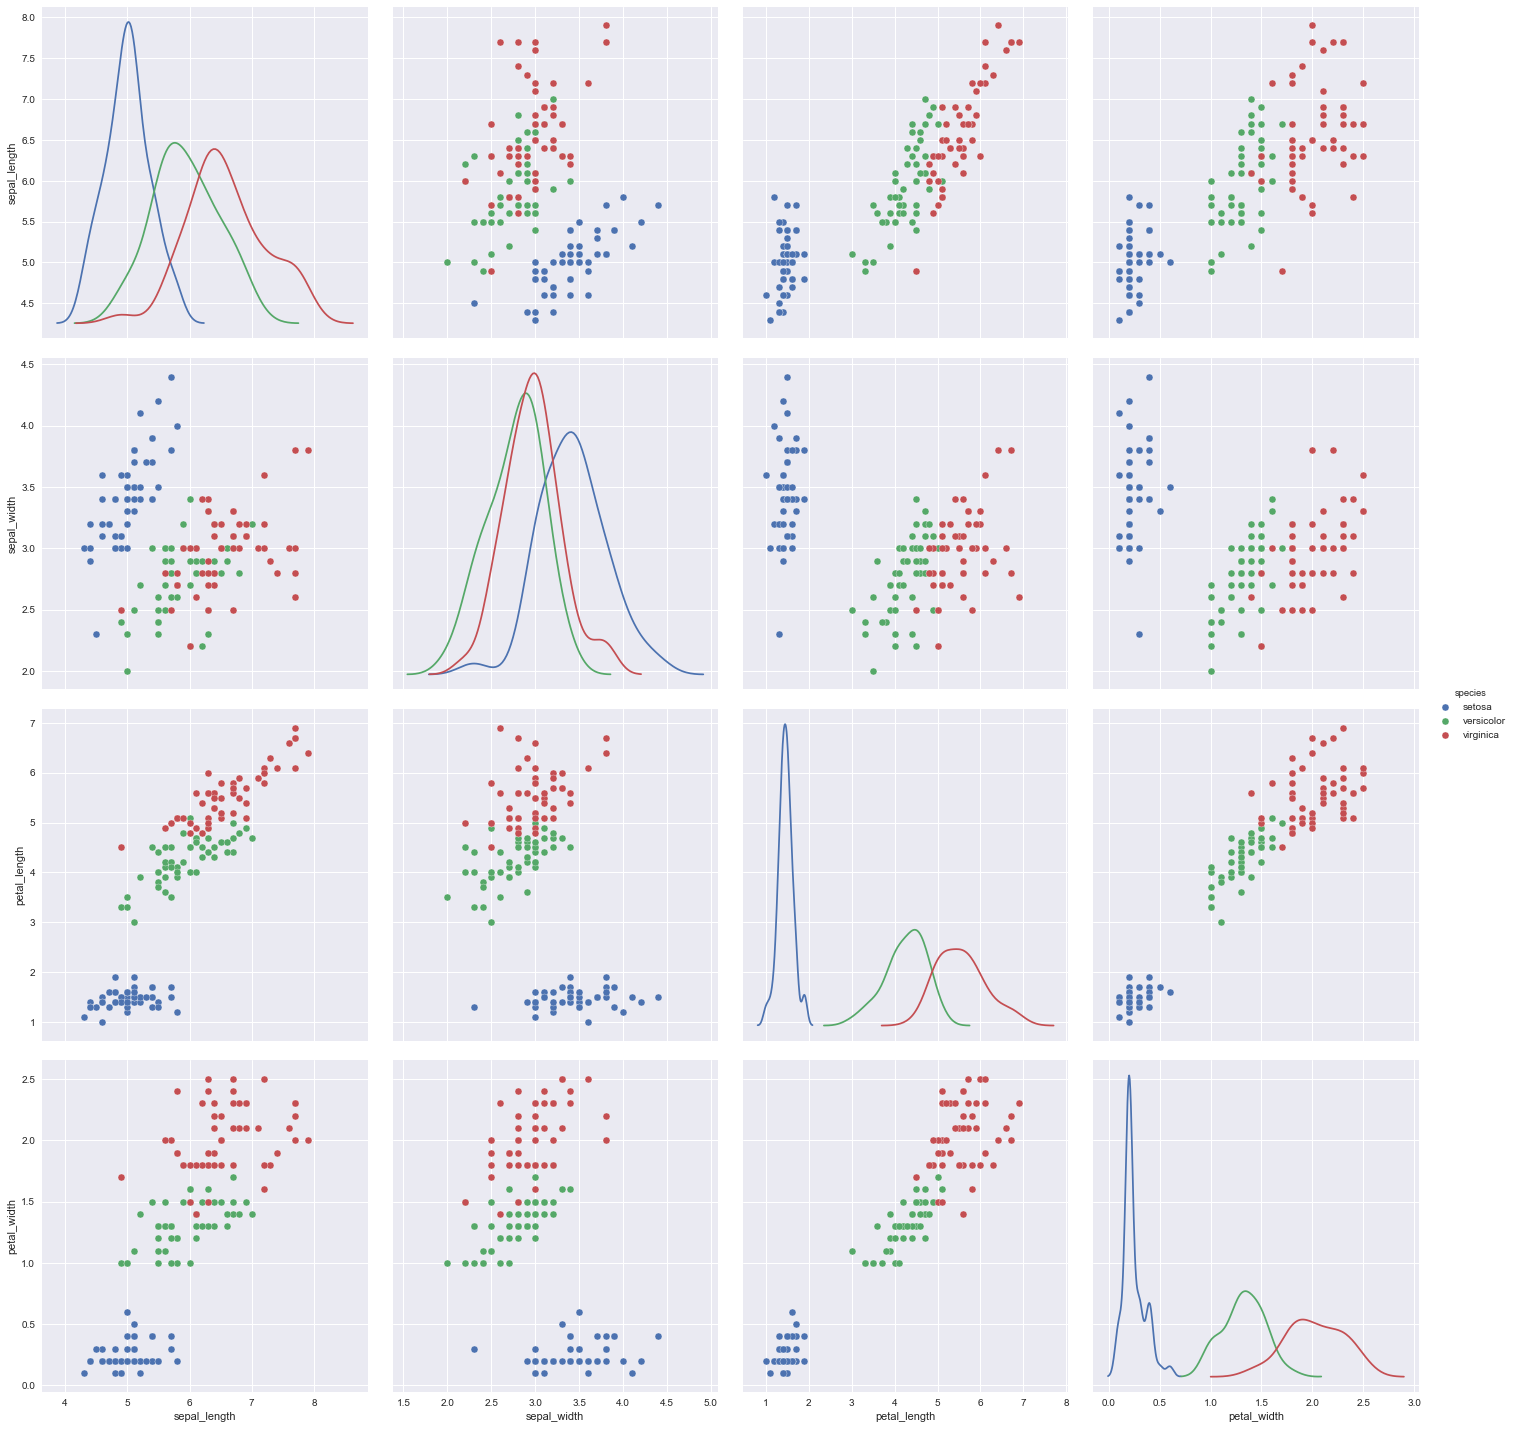

In [9]:
sns.pairplot(flight, hue = 'species', diag_kind = 'kde', size = 5)

In [10]:
encoder = LabelEncoder()
flight['species'] = encoder.fit_transform(flight['species'])

In [11]:
flight.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,0


In [12]:
flight.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
flight.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


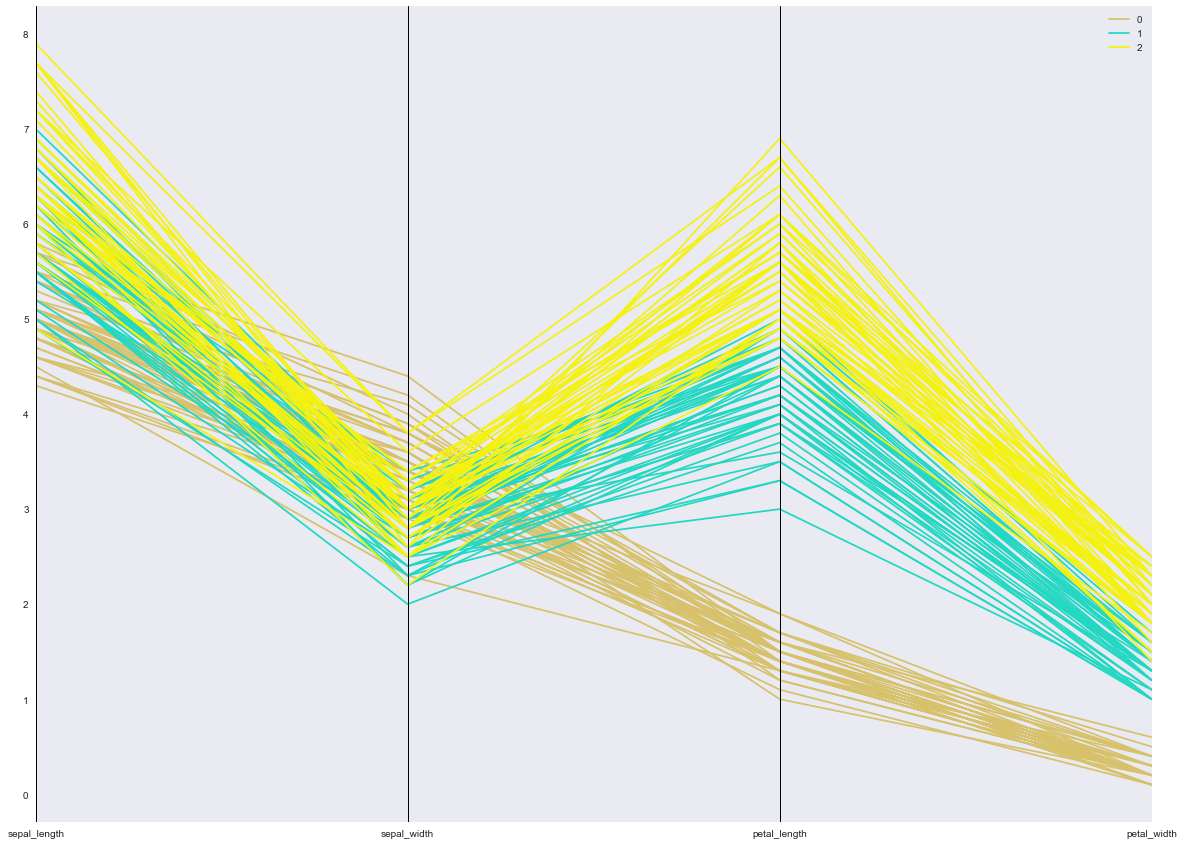

In [14]:
width, height = 20, 15
size = width, height
plt.figure(figsize = size)
parallel_coordinates(flight, 'species')

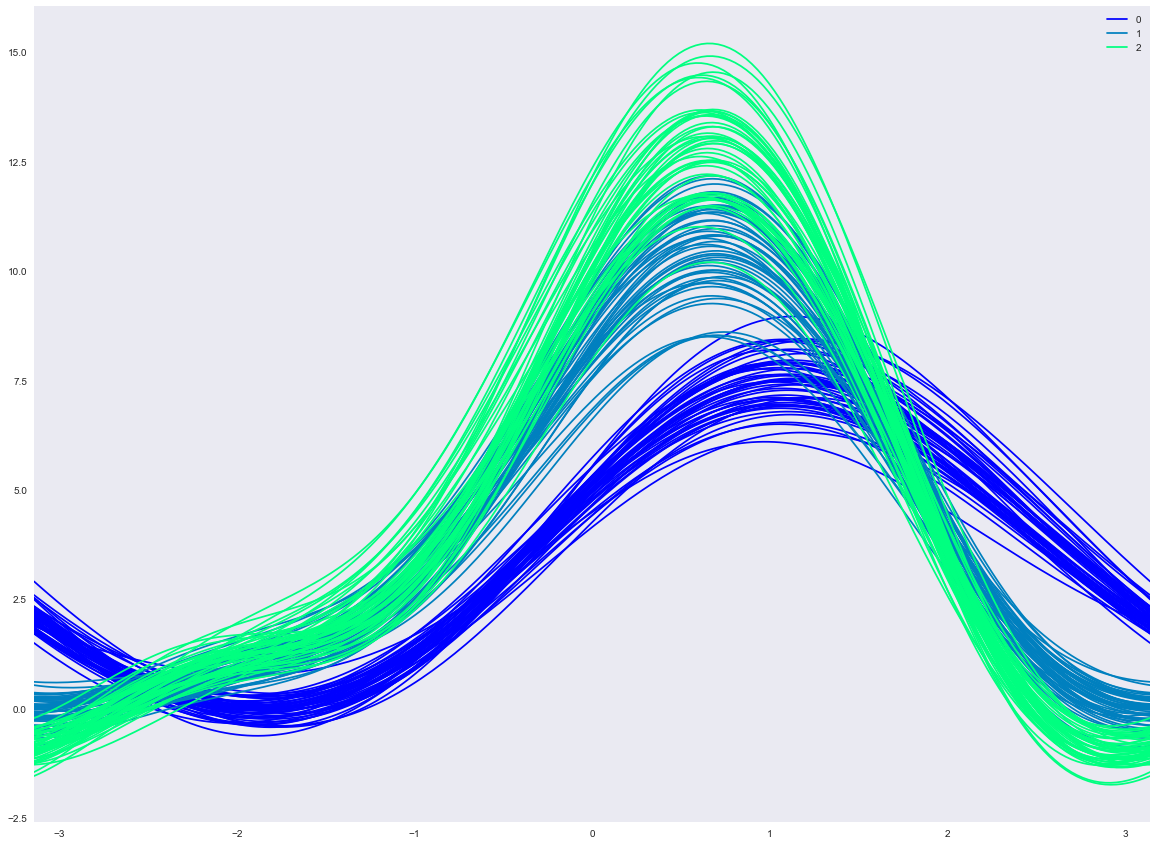

In [15]:
plt.figure(figsize = size)
andrews_curves(flight, 'species', colormap = 'winter')

In [16]:
df = (flight - flight.min()) / (flight.max() - flight.min())
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
111,0.583333,0.291667,0.728814,0.750000,1.0
48,0.277778,0.708333,0.084746,0.041667,0.0
141,0.722222,0.458333,0.694915,0.916667,1.0
7,0.194444,0.583333,0.084746,0.041667,0.0
22,0.083333,0.666667,0.000000,0.041667,0.0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(flight, train_size = 0.60)

In [19]:
len(train), len(test)

(90, 60)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
features = flight.columns[:-2]
target = flight.columns[ -1]

In [22]:
model = DecisionTreeClassifier()
model = model.fit(train[features], train[target])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
predicted = model.predict(test[features])

In [25]:
print('Accuracy Score:', accuracy_score(test[target], predicted) * 100)

Accuracy Score: 95.0


In [26]:
from sklearn.tree import export_graphviz

In [27]:
Class_names = list(set(encoder.inverse_transform(flight[target])))
export_graphviz(model,out_file = 'iris.dot',
                       feature_names = features,
                       class_names = Class_names,
                       filled = True,
                       rounded = True,
                       special_characters = True)
graph = pydotplus.graphviz.graph_from_dot_file("iris.dot")

In [32]:
png = graph.create_png()

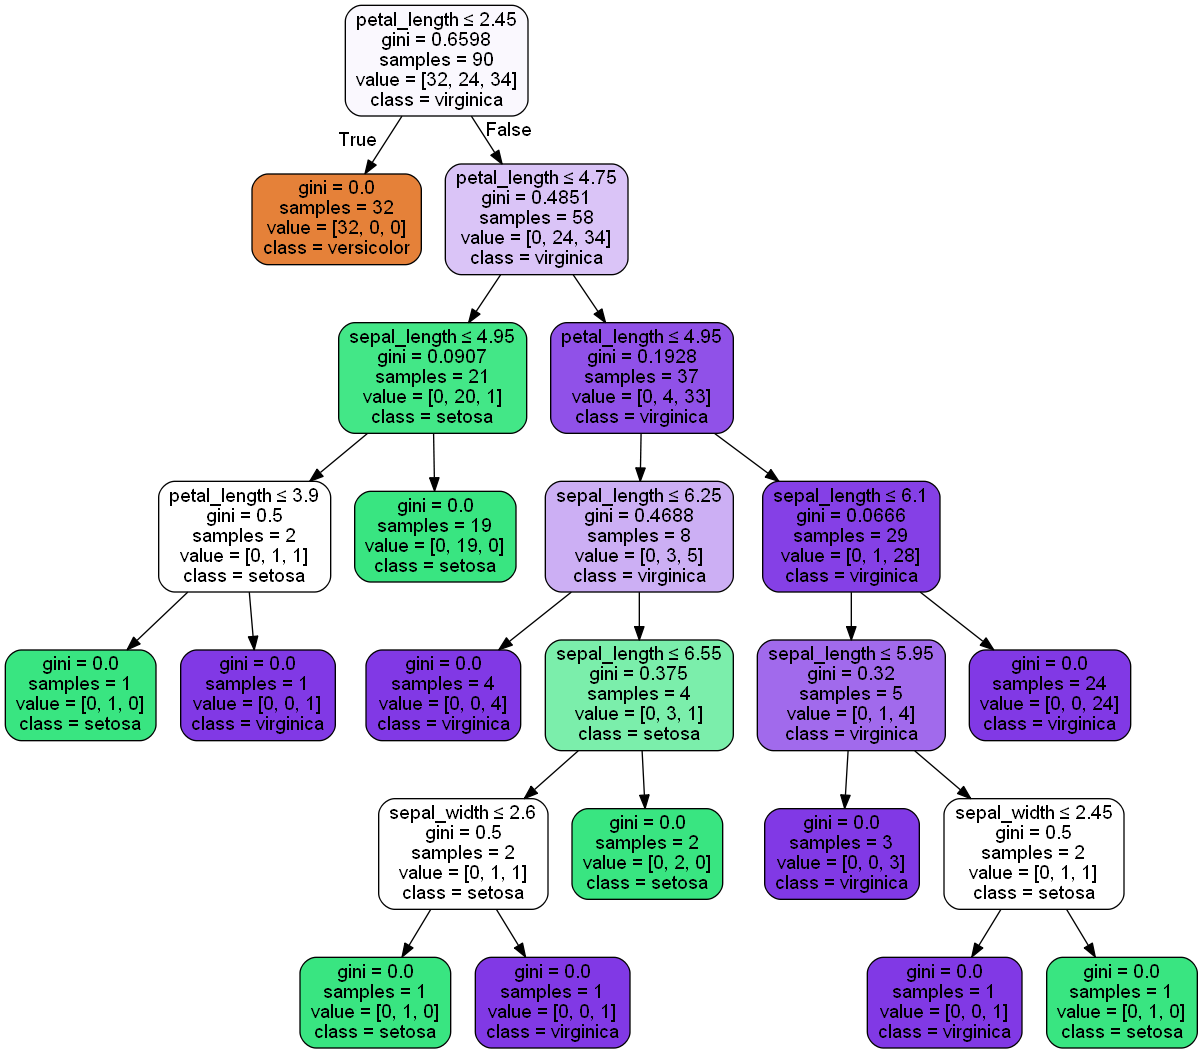

In [33]:
from IPython.display import Image
Image(png)

In [34]:
model = DecisionTreeClassifier(criterion = 'entropy')
model = model.fit(train[features],train[target])

In [35]:
predicted = model.predict(test[features])

In [36]:
print('Accuracy Score : ', accuracy_score(test[target], predicted)*100)

Accuracy Score :  98.3333333333


In [37]:
ddata = export_graphviz(model,
                       out_file = None,
                       feature_names = features,
                       class_names = Class_names,
                       filled = True,
                       rounded = True,
                       special_characters = True)

In [38]:
graph = pydotplus.graph_from_dot_data(ddata)

In [39]:
png = graph.create_png()

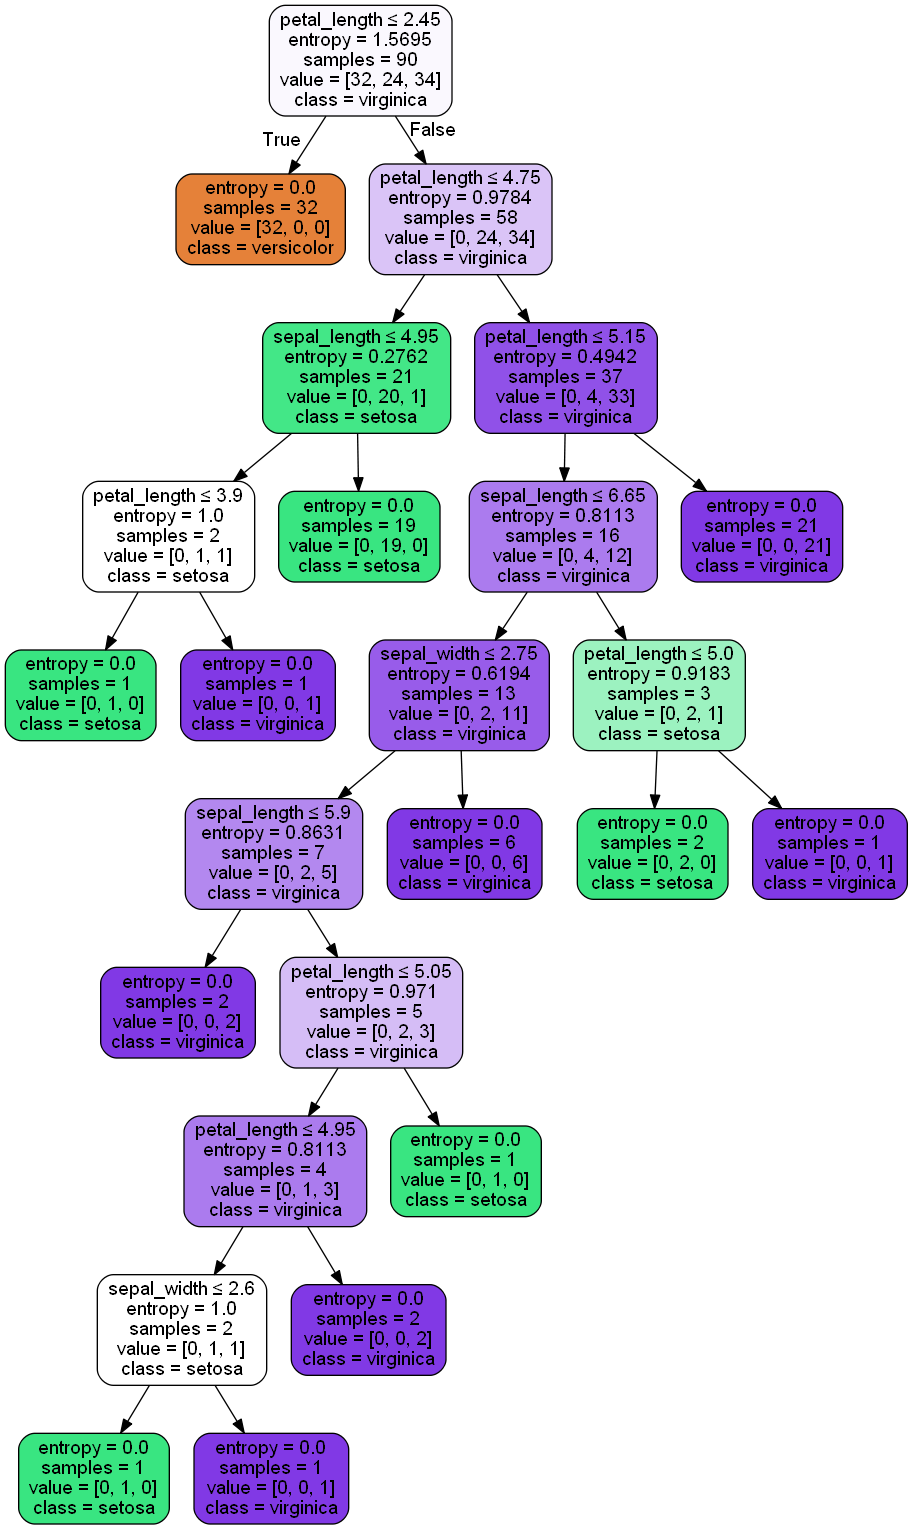

In [40]:
Image(png)